In [5]:
import pandas as pd

# Carregar o DataFrame
obesityDT = pd.read_csv('MSWithInsulin (1).csv')

# Filtrar pessoas com Obesity = 0
obesity_0_data = obesityDT[obesityDT['Obesity'] == 0]

# Número de pessoas com Obesity = 0
num_obesity_0 = len(obesity_0_data)

# Imprimir o resultado
print(f'O número de pessoas com Obesity = 0 é: {num_obesity_0}')

# Filtrar o DataFrame
filtered_data = obesityDT[(obesityDT['Obesity'] == 0) & (obesityDT['smoking'] != 'Never smoker')]

# Obter o número de pessoas no resultado
num_people = len(filtered_data)

# Exibir o resultado
print(f'O número de pessoas com obesidade e que não são "Never Smoking" é: {num_people}')


O número de pessoas com Obesity = 0 é: 888
O número de pessoas com obesidade e que não são "Never Smoking" é: 372


In [6]:
# Filtrar pessoas com Obesity = 0 e marital_status = married
obesity_0_married_data = obesityDT[(obesityDT['Obesity'] == 0) & (obesityDT['marital_status'] == 'married')]

# Número de pessoas que atendem aos critérios
num_people = len(obesity_0_married_data)

# Imprimir o resultado
print(f'O número de pessoas com Obesity = 0 e marital_status = married é: {num_people}')

O número de pessoas com Obesity = 0 e marital_status = married é: 485


In [7]:
import pandas as pd

# Carregar o DataFrame
obesityDT = pd.read_csv('MSWithInsulin (1).csv')

# Verificar os valores únicos em 'Obesity' e 'sex'
#print(obesityDT['Obesity'].unique())
#print(obesityDT['sex'].unique())

# Filtrar pessoas com Obesity = 0 e separar por sexo
obesity_0_male_data = obesityDT[(obesityDT['Obesity'] == 0) & (obesityDT['sex'].str.lower() == 'male')]
obesity_0_female_data = obesityDT[(obesityDT['Obesity'] == 0) & (obesityDT['sex'].str.lower() == 'female')]

# Número de pessoas com Obesity = 0 para cada sexo
num_obesity_0_male = len(obesity_0_male_data)
num_obesity_0_female = len(obesity_0_female_data)

# Imprimir os resultados
print(f'O número de pessoas do sexo masculino com Obesity = 0 é: {num_obesity_0_male}')
print(f'O número de pessoas do sexo feminino com Obesity = 0 é: {num_obesity_0_female}')


O número de pessoas do sexo masculino com Obesity = 0 é: 540
O número de pessoas do sexo feminino com Obesity = 0 é: 348


In [8]:
# Filtrar pessoas com Obesity = 0
obesity_0_data = obesityDT[obesityDT['Obesity'] == 0]

# Número de pessoas com Obesity = 0
num_obesity_0 = len(obesity_0_data)

# Filtrar pessoas com Obesity = 0, BloodInsulin < 19 e BloodGlucose > 100
obesity_0_condition_data = obesity_0_data[(obesity_0_data['BloodInsulin'] < 19) & (obesity_0_data['BloodGlucose'] > 100)]

# Número de pessoas com Obesity = 0, BloodInsulin < 19 e BloodGlucose > 100
num_obesity_0_condition = len(obesity_0_condition_data)

# Imprimir os resultados
print(f'O número de pessoas com Obesity = 0 é: {num_obesity_0}')
print(f'O número de pessoas com Obesity = 0, BloodInsulin < 19 e BloodGlucose > 100 é: {num_obesity_0_condition}')


O número de pessoas com Obesity = 0 é: 888
O número de pessoas com Obesity = 0, BloodInsulin < 19 e BloodGlucose > 100 é: 265


In [26]:
# Defina a ordem personalizada dos valores em 'annual_income'
ordem_personalizada = [
    '0-4999', '<20000', '5000-9999', '10000-14999', '15000-19999',
    '20000-24999', '25000-34999', '35000-44999', '45000-54999',
    '55000-64999', '65000-74999', '75000-99999', '100000+', '20000+'  # Adicione '20000+' aqui
]

# Lista de respostas únicas na coluna 'annual_income' ordenadas pela ordem personalizada
respostas_unicas = sorted(set(obesityDT['annual_income']), key=lambda x: ordem_personalizada.index(x))

# Crie uma lista para armazenar os resultados
resultados = []

# Calcule o número de casos em que Obesity = 0 para cada valor em 'annual_income'
for resposta in respostas_unicas:
    # Filtra os dados para o valor específico em 'annual_income'
    subset = obesityDT[obesityDT['annual_income'] == resposta]
    
    # Calcula o número de casos em que Obesity = 0
    casos_obesity_0 = subset[subset['Obesity'] == 0].shape[0]
    
    # Adiciona os resultados à lista
    resultados.append({'annual_income': resposta, 'casos_obesity_0': casos_obesity_0})

# Crie um DataFrame a partir da lista de resultados
resultados_df = pd.DataFrame(resultados)

# Imprime os resultados finais
print(resultados_df)

# Adicione um contador dos valores casos_obesity_0
contador_casos_obesity_0 = resultados_df['casos_obesity_0'].sum()

print(f"\nTotal de casos com Obesity = 0: {contador_casos_obesity_0}")


   annual_income  casos_obesity_0
0         0-4999               34
1         <20000                6
2      5000-9999               46
3    10000-14999               61
4    15000-19999               61
5    20000-24999               82
6    25000-34999               97
7    35000-44999               90
8    45000-54999               49
9    55000-64999               45
10   65000-74999               51
11   75000-99999               69
12       100000+              175
13        20000+               22

Total de casos com Obesity = 0: 888


In [23]:
# Lista de respostas únicas na coluna 'annual_income'
respostas_unicas = obesityDT['annual_income'].unique()
print(respostas_unicas)

['75000-99999' '45000-54999' '5000-9999' '20000-24999' '0-4999' '100000+'
 '65000-74999' '35000-44999' '25000-34999' '<20000' '15000-19999'
 '55000-64999' '10000-14999' '20000+']


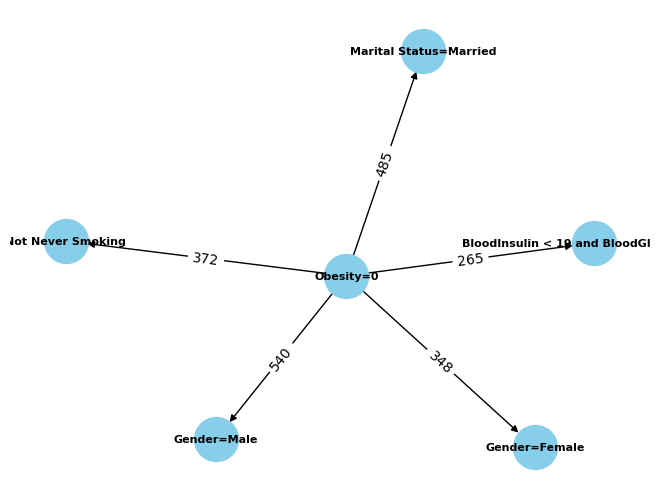

In [37]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Supondo que 'obesityDT' seja o DataFrame com os dados fornecidos

# Criar um grafo direcionado
G = nx.DiGraph()

# Adicionar nós e arestas ao grafo com base nas relações mencionadas
G.add_node("Obesity=0")
G.add_node("Not Never Smoking")
G.add_node("Marital Status=Married")
G.add_node("Gender=Male")
G.add_node("Gender=Female")
G.add_node("BloodInsulin < 19 and BloodGlucose > 100")

G.add_edge("Obesity=0", "Not Never Smoking", weight=372)
G.add_edge("Obesity=0", "Marital Status=Married", weight=485)
G.add_edge("Obesity=0", "Gender=Male", weight=540)
G.add_edge("Obesity=0", "Gender=Female", weight=348)
G.add_edge("Obesity=0", "BloodInsulin < 19 and BloodGlucose > 100", weight=265)

# Layout do grafo
pos = nx.spring_layout(G)

# Desenhar o grafo
labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=8, font_color='black', font_weight='bold', node_color='skyblue')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


In [48]:

# Selecionar apenas as colunas relevantes
columns_of_interest = ["age","sex","marital_status","annual_income","race","fname","lname","WaistCirc","BMI","albuminuria","UrAlbCr","UricAcid","GGT","ALT","AST","CPK","HOMA","BloodGlucose","BloodInsulin","HDL","Trigylcerides","smoking","Hypertension","Dyslipidemia_HDL","Dyslipidemia","Hyperglycemia","Obesity","MetabolicSyndrome"]

# Criar um DataFrame apenas com as colunas de interesse
df_subset = obesityDT[columns_of_interest]

# Filtrar casos onde Obesity=0
df_obesity_0 = df_subset[df_subset["Obesity"] == 0]

# Calcular a porcentagem de cada valor em relação a Obesity=0
percentage_dict = {}

for column in df_subset.columns[:-1]:  # Excluir a coluna 'Obesity'
    counts = df_obesity_0[column].value_counts(normalize=True) * 100
    percentage_dict[column] = counts

# Exibir os resultados
for column, percentages in percentage_dict.items():
    print(f"\nColuna: {column}")
    print(percentages)
    print(f"Total de casos com Obesity = 0: {df_obesity_0.shape[0]}\n")


Coluna: age
80    4.617117
21    3.490991
22    3.040541
31    3.040541
30    2.815315
        ...   
79    0.563063
76    0.563063
73    0.563063
77    0.450450
75    0.225225
Name: age, Length: 61, dtype: float64
Total de casos com Obesity = 0: 888


Coluna: sex
Male      60.810811
Female    39.189189
Name: sex, dtype: float64
Total de casos com Obesity = 0: 888


Coluna: marital_status
married      54.617117
single       28.265766
divorced      8.671171
separated     4.391892
widowed       4.054054
Name: marital_status, dtype: float64
Total de casos com Obesity = 0: 888


Coluna: annual_income
100000+        19.707207
25000-34999    10.923423
35000-44999    10.135135
20000-24999     9.234234
75000-99999     7.770270
10000-14999     6.869369
15000-19999     6.869369
65000-74999     5.743243
45000-54999     5.518018
5000-9999       5.180180
55000-64999     5.067568
0-4999          3.828829
20000+          2.477477
<20000          0.675676
Name: annual_income, dtype: float64
Total de 

In [50]:
# Lista de respostas únicas na coluna 'annual_income'
respostas_unicas = obesityDT['age'].unique()
print(respostas_unicas)

[22 44 21 43 80 26 30 36 28 38 62 65 77 29 50 48 61 34 52 64 72 56 69 78
 47 39 46 23 68 40 35 25 20 70 53 51 27 54 71 42 59 60 37 31 32 24 33 49
 63 74 58 45 55 57 79 66 41 75 67 73 76]


In [51]:
# Supondo que você tenha um DataFrame chamado obesityDT

# Filtra apenas as linhas onde Obesity é igual a 0
obesity_0_data = obesityDT[obesityDT['Obesity'] == 0]

# Conta o número de pessoas em cada idade
idade_counts = obesity_0_data['age'].value_counts()

# Exibe as idades e o número de pessoas com Obesity = 0
print("Idade | Número de Pessoas com Obesity = 0")
print("---------------------------------------")
for idade, count in idade_counts.items():
    print(f"{idade} | {count}")

Idade | Número de Pessoas com Obesity = 0
---------------------------------------
80 | 41
21 | 31
22 | 27
31 | 27
30 | 25
20 | 24
39 | 23
24 | 23
41 | 21
34 | 20
36 | 19
28 | 19
23 | 18
42 | 18
38 | 18
45 | 18
26 | 17
35 | 17
51 | 17
27 | 17
33 | 16
25 | 16
50 | 16
62 | 16
40 | 16
55 | 15
43 | 15
58 | 15
64 | 15
37 | 14
29 | 14
61 | 14
47 | 13
56 | 13
54 | 13
48 | 13
63 | 12
52 | 12
32 | 12
57 | 12
60 | 12
46 | 12
44 | 11
49 | 11
69 | 11
70 | 10
65 | 10
66 | 9
53 | 9
67 | 9
74 | 8
71 | 7
68 | 7
72 | 7
59 | 6
78 | 6
79 | 5
76 | 5
73 | 5
77 | 4
75 | 2


In [53]:
import pandas as pd

# Supondo que você tenha um DataFrame chamado obesityDT

# Define as faixas etárias
faixas_etarias = [0, 25, 35, 45, 55, 65, 75, 85, float('inf')]
rotulos_faixas_etarias = ['0-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+']

# Cria uma nova coluna 'faixa_etaria' com base nas idades
obesityDT['faixa_etaria'] = pd.cut(obesityDT['age'], bins=faixas_etarias, labels=rotulos_faixas_etarias, right=False)

# Filtra apenas as linhas onde Obesity é igual a 0
obesity_0_data = obesityDT[obesityDT['Obesity'] == 0]

# Conta o número de pessoas em cada faixa etária
faixa_etaria_counts = obesity_0_data['faixa_etaria'].value_counts().sort_index()

# Exibe as faixas etárias e o número de pessoas com Obesity = 0
print("Faixa Etária | Número de Pessoas com Obesity = 0")
print("----------------------------------------------")
for faixa_etaria, count in faixa_etaria_counts.items():
    print(f"{faixa_etaria} | {count}")


Faixa Etária | Número de Pessoas com Obesity = 0
----------------------------------------------
0-24 | 123
25-34 | 183
35-44 | 172
45-54 | 134
55-64 | 130
65-74 | 83
75-84 | 63
85+ | 0


In [55]:
# Lista de respostas únicas na coluna 'annual_income'
respostas_unicas = obesityDT['marital_status'].unique()
print(respostas_unicas)

['single' 'married' 'widowed' 'separated' 'divorced']


In [56]:
# Filtrar pessoas com obesity=0
df_obesity_0 = obesityDT[obesityDT['Obesity'] == 0]

# Calcular o número de pessoas para cada valor nas variáveis 'marital_status'
marital_status_counts = df_obesity_0['marital_status'].value_counts()

# Exibir o resultado
print(marital_status_counts)

married      485
single       251
divorced      77
separated     39
widowed       36
Name: marital_status, dtype: int64


In [57]:
# Filtrar pessoas com obesity=0
df_obesity_0 = obesityDT[obesityDT['Obesity'] == 0]

# Calcular o número total de obesos
total_obese = len(df_obesity_0)

# Calcular a porcentagem para cada categoria
marital_status_counts = df_obesity_0['marital_status'].value_counts()
porcentagens = (marital_status_counts / total_obese) * 100

# Exibir o resultado
print(porcentagens)


married      54.617117
single       28.265766
divorced      8.671171
separated     4.391892
widowed       4.054054
Name: marital_status, dtype: float64
